##Importing Libraries

In [46]:
#Contributed by AP22110011297
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

##a.Loading the dataset

In [47]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

##b.Splitting the dataset


In [48]:
#splitting into train & test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2) # 80% training and 20% test

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [49]:
#Euclidean distance calculator
def e_d(x,y):
  return np.sqrt(np.sum((x-y)**2))

#K-NN Classifier function
def knn_classify(x_train, y_train, x_test, k):
  predict = []

  for points in x_test:
    distances = []

    for i in range(len(x_train)):
      d = e_d(points, x_train[i])
      distances.append((d, y_train[i]))

    distances.sort(key=lambda x: x[0])
    knn = [distances[i][1] for i in range(k)]

    predict.append(Counter(knn).most_common(1)[0][0])

  return predict

In [50]:
y_pred = knn_classify(x_train,y_train,x_test,3) # K = 3

##Model Testing

In [51]:
def acc(y_true, y_pred):
  return np.mean(y_true == y_pred) * 100

print(f"Accuracy: {acc(y_test, y_pred)}%")

def confusion_matrix(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for t, p in zip(y_true, y_pred):
        matrix[t, p] += 1

    return matrix

print("\n Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

Accuracy: 93.33333333333333%

 Confusion Matrix : 
 [[ 5  0  0]
 [ 0 11  0]
 [ 0  2 12]]


##d.K vs Accuracy

In [56]:
def plot_k_vs_accuracy(X_train, X_test, y_train, y_test, k_vals):
    accuracies = []
    error = []

    for k in k_vals:
        y_pred = knn_classify(X_train, y_train, X_test, k)
        a = acc(y_test, y_pred)
        accuracies.append(a)
        error.append(100 - a)

    plt.plot(k_vals, accuracies,marker="*")
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('k vs Accuracy (Iris dataset)')
    plt.grid(True)
    plt.show()

    return k_vals[np.argmax(accuracies)], np.max(accuracies),error

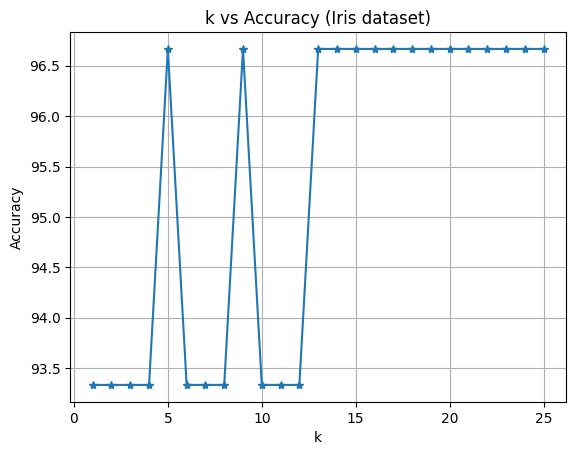

Best k: 5 with accuracy: 96.67%


In [57]:
k_vals = range(1, 26)
best_k, best_accuracy,error = plot_k_vs_accuracy(x_train, x_test, y_train, y_test, k_vals)
print(f"Best k: {best_k} with accuracy: {best_accuracy:.2f}%")

In [60]:
def K_vs_Error(k_vals,errors):
    plt.plot(k_vals, errors,marker="*",color="r")
    plt.xlabel('K')
    plt.ylabel('Error')
    plt.title('K vs Error (Iris dataset)')
    plt.grid(True)
    plt.show()

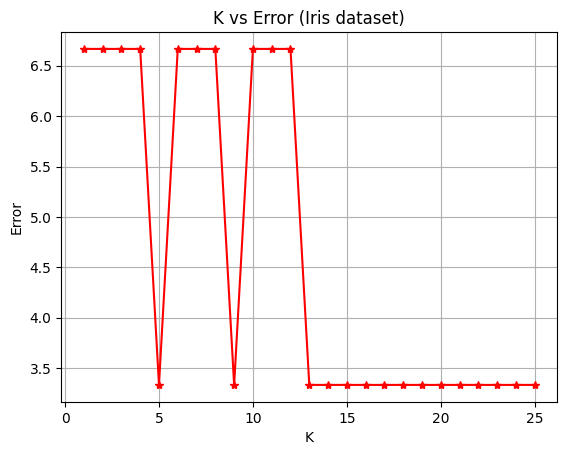

In [61]:
K_vs_Error(k_vals,error)